In [80]:
import copy
import random

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

data = pd.read_csv('data/dbscan_test.csv', header=None).to_numpy()
data.shape

(17, 2)

In [89]:
class DBSCAN:
    def __init__(self, eps, min_p):
        self.eps = eps
        self.min_p = min_p

        self.k = -1
        self.neighbor_list = []  # 用来保存每个数据的邻域
        self.omega_list = []  # 核心对象集合
        self.gama = None  # 初始时将所有点标记为未访问
        self.cluster = None  # 聚类

        self.data = None

    def fit(self, x):
        self.data = x
        return self.find()

    def find(self):
        self.gama = set(range(len(self.data)))
        self.cluster = np.full(len(self.data), -1).tolist()

        for i in range(len(self.data)):
            self.neighbor_list.append(self.find_neighbor(i))
            # 取倒数第一个进行if，如果大于设定的样本数，即为核心点
            if len(self.neighbor_list[-1]) >= self.min_p:
                self.omega_list.append(i)  # 将样本加入核心对象集合
        omega_list = set(self.omega_list)  # 转化为集合便于操作

        while len(omega_list) > 0:
            gama_old = copy.deepcopy(self.gama)
            j = random.choice(list(omega_list))  # 随机选取一个核心对象
            # k计数，从0开始为第一个
            self.k = self.k + 1
            # 初始化Q
            Q = list()
            # 记录访问点
            Q.append(j)
            # 从gama中移除j,剩余未访问点
            self.gama.remove(j)

            while len(Q) > 0:
                # 将第一个点赋值给q,Q队列输出给q,先入先出。
                q = Q[0]
                Q.remove(q)
                if len(self.neighbor_list[q]) >= self.min_p:
                    # &按位与运算符：参与运算的两个值,如果两个相应位都为1,则该位的结果为1,否则为0
                    delta = self.neighbor_list[q] & self.gama
                    delta_list = list(delta)
                    for i in range(len(delta)):
                        # 在Q中增加访问点
                        Q.append(delta_list[i])
                        # 从gama中移除访问点,剩余未访问点
                        self.gama = self.gama - delta
            # 原始未访问点-剩余未访问点=访问点
            Ck = gama_old - self.gama
            Cklist = list(Ck)
            for i in range(len(Ck)):
                # 类型为k
                self.cluster[Cklist[i]] = self.k
            # 剩余核心点
            omega_list = omega_list - Ck
        return np.array(self.cluster)

    def find_neighbor(self, j):
        n = list()
        for i in range(self.data.shape[0]):
            temp = np.sqrt(np.sum(np.square(self.data[j] - self.data[i])))  # 计算欧式距离
            # 如果距离小于eps, 在列表末尾添加新的对象
            if temp <= self.eps:
                n.append(i)
        # 返回邻居的索引
        return set(n)

In [104]:
eclipse = 2.01
minPoints = 4

dbscan = DBSCAN(eclipse, minPoints)
cluster = dbscan.fit(data)
print(cluster)

[ 1  1  1  1  1  1  0  0  0  0  0 -1  2  2  2 -1  2]


Text(0, 0.5, 'feature2')

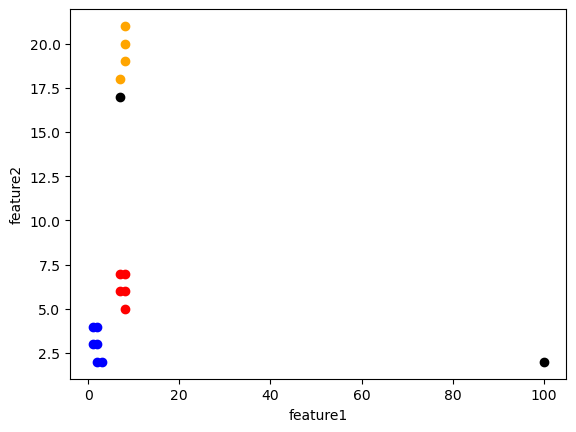

In [103]:
color = ['red', 'blue', 'orange', 'pink', 'green']
for i in range(cluster.max() + 1):
    plt.scatter(list(data[cluster == i, 0]), list(data[cluster == i, 1]), c=color[i])
# 噪声点
plt.scatter(list(data[cluster == -1, 0]), list(data[cluster == -1, 1]), c='black')
plt.xlabel('feature1')
plt.ylabel('feature2')